In [1]:
import SimpleITK as sitk
from platipy.imaging import ImageVisualiser

In [2]:
img_ct_lung_5 = sitk.ReadImage("./PRHGD5257_LUNG/IMAGES/PRHGD5257_LUNG_0_CT_NON_CONTRAST_CHEST_5.nii.gz")
img_ct_lung_10 = sitk.ReadImage("./PRHGD5257_LUNG/IMAGES/PRHGD5257_LUNG_1_CT_NON_CONTRAST_CHEST_10.nii.gz")

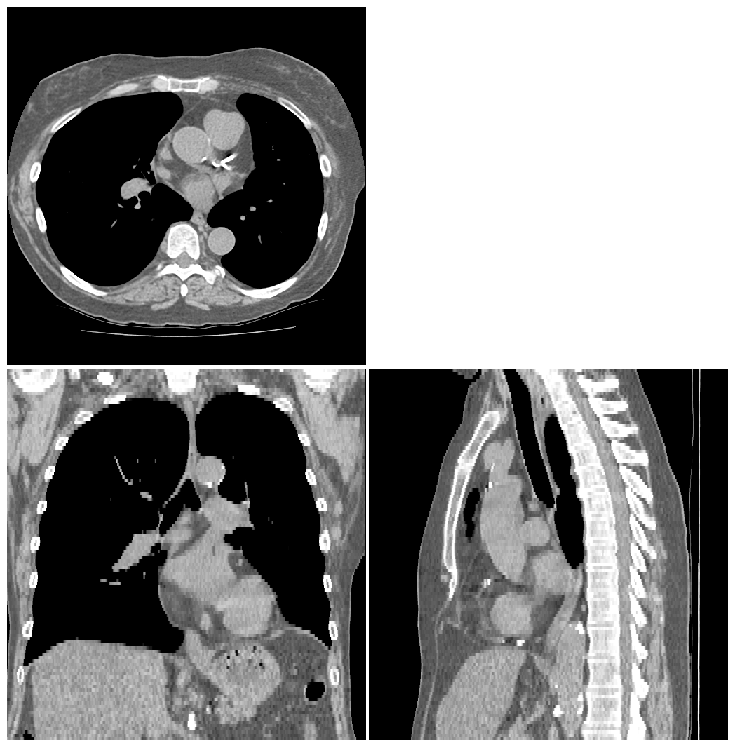

In [3]:
vis = ImageVisualiser(img_ct_lung_5)
fig = vis.show()

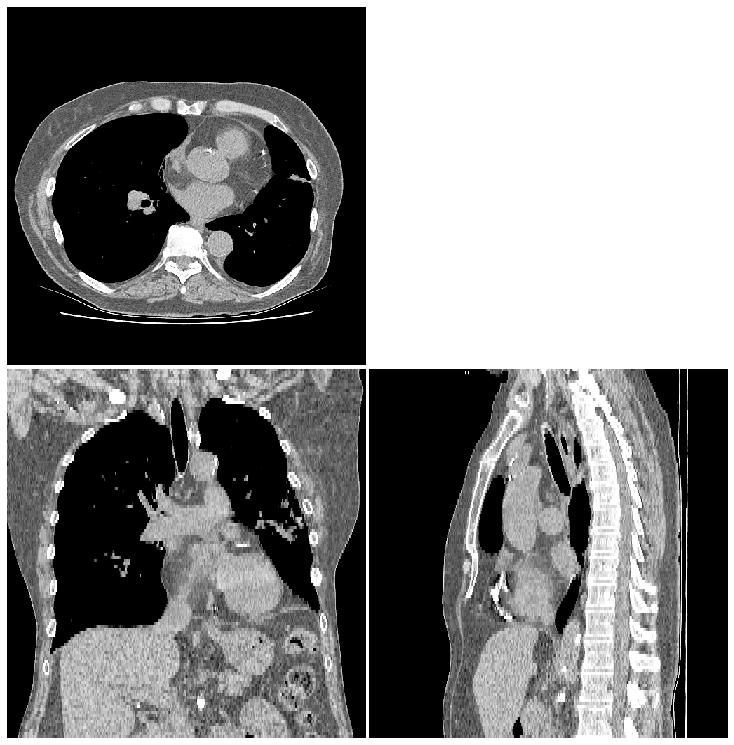

In [4]:
vis = ImageVisualiser(img_ct_lung_10)
fig = vis.show()

In [5]:
from platipy.imaging.registration.linear import linear_registration

In [ ]:
img_ct, tfm = linear_registration(
    img_ct_lung_5,
    img_ct_lung_10,
    verbose = True
)